# Mining Actionable Insights From the 3,000+ Metabolomics Studies

This project is in active development and this page will likely be updated in the near future.

## Technologies

This project involved the following stack
- SQL, in the extraction/server-side-wrangling of the starting dataset
- SQL, in the creation of a results database and API calls
- RESTful API via Flask
- Frontend via Dash/Plotly, possibly reworking to react.js
- AWS: RDB for DB, EC3 for virtual machine, lambda for API
- Python for a pipeline and API back-end, with extensive use of networkx and pandas
- Snakemake

## Introduction

The [West Coast Metabolomics Center](https://metabolomics.ucdavis.edu/core-services) has collected over 64 million spectra from over 200 thousand samples from 3 thousand studies. These stuides cover a very broad space of species, organs, and diseases. This work engages in a meta-analysis of the spectra from those studies in order to 
1) Mine broad/actionable insights from this dataset
2) Provide easy access/analysis to researchers for the specific groupings of compounds, species, organs, and diseases that might interest them.

## Method Overview

Because the Fiehnlab uses the same procedure and experimental analysis, this meta analysis is conducted on the individual samples themselves rather than combining just the results like [this type](http://pages.stat.wisc.edu/~wardrop/courses/meta2.pdf) of p-value meta-analysis. Instead, the procedure is outlined here. 

### Fold Change

There are 4 types of metadata that accompany each sample: Compound, Species, Organ, and Disease. All other metadata are discarded. For each combination of these metadata the average instensity can be determined. Then, we can compare the average intensities to obtain a fold change. For example,

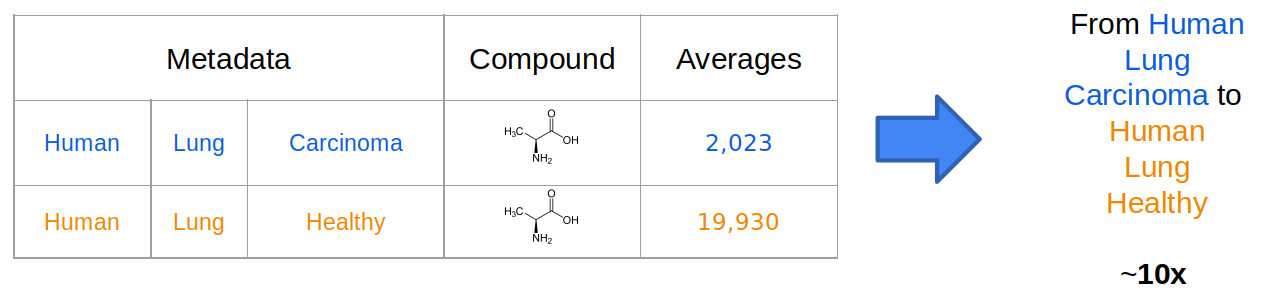

We could, for a single compound, place these fold values compactly in a matrix

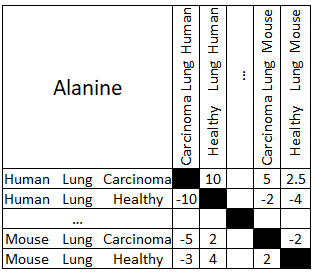

Where ... represents many unwritten metadata combinations (FYI, its >1000) 

This procedure can provide a fold change analysis among any metadata combination for which the West Coast Metabolomics Center has data. Howevever goal 1) is to mine broad truths. 

### Grouping fold changes

In order to mine general truths, we incorporate hierarchies for the metadata. We use the [ClassyFire](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0174-y) heirarchy for compounds, the [NCBI](https://www.ncbi.nlm.nih.gov/taxonomy) taxonomy for species, and the [MeSH](https://www.nlm.nih.gov/mesh/intro_trees.html) hierarchies for organ and disease. 

A non-base node on each hierarchy is the "parent" of multiple (sometimes many) metadata "children". For example, for species, the "mammal" node might be the parent of {humans, mice, rats, bears, etc}. Therefore, we can traverse these hierarchies, and for each node on each hierarchy, generate sets of metadata combinations that are relevant for those particular node positions. For example, if these *very* simplified hierarchies were sufficient

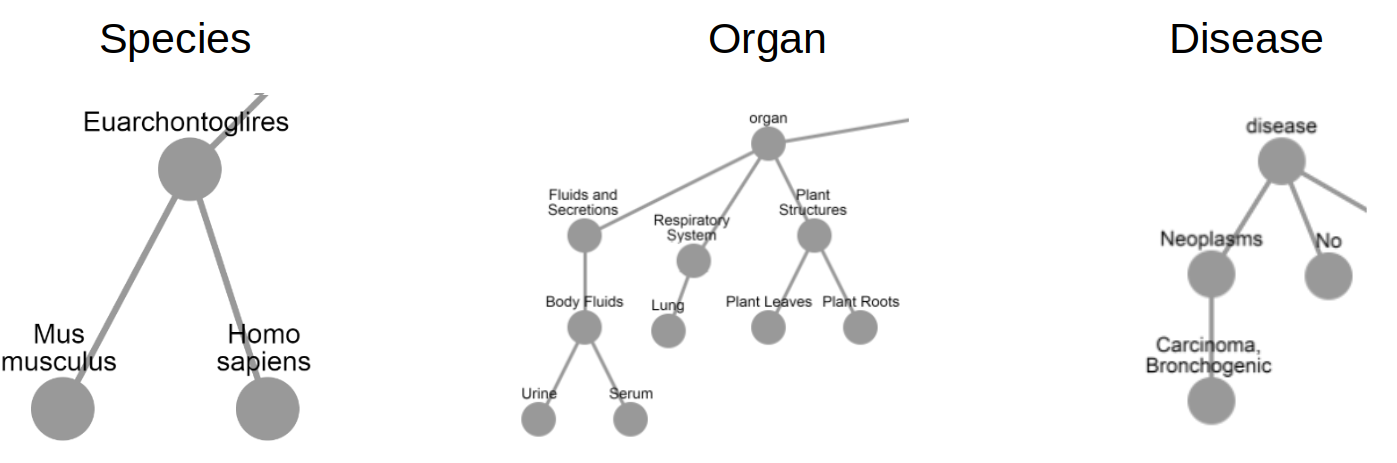

Then we could choose {[Euarchontoglires](https://en.wikipedia.org/wiki/Euarchontoglires), Lung, No disease} vs {Euarchontoglires, Lung, Carcinoma}, which, using the above matrix, we could represent like

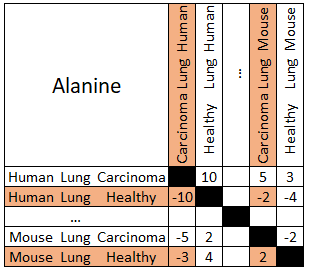


and generate the list of fold changes (-10, -2, -3, 2). We then apply rules to this list, such as if they all have the same sign, we keep only the minimum (this is done to conserve memory during analysis and on the output DB).
Combinatorially, this produces a number of results in the quadrillions, but thanks to some symmetry, pre-computing, and null sets, we end up with about only 50 thousand results per compound.

## Results

### Webtool

A very-early prototype of the webtool can be found at:

LINK HERE

Right now, the tool talks to a free-tier AWS RDB, which is unfortunately likely to be paused. It is not very pretty at the moment (possibly will rework in react.js). Visualizations are in active development.

### Types of Queries

1. Simple 
2. Large sets of queries simultaneously
3. Groupings
4. Sets of Groupings
5. Except for



### Advanced Filtering and Visualizations

1. visualizations go here
